In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib


In [88]:
df = pd.read_csv('vgsales.csv')

In [89]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [90]:
df = df.dropna()

In [91]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [92]:
# df['Genre'] = df['Genre'].str.replace('-', '')


In [93]:
x = df['Year']
y = df['NA_Sales']

In [94]:
x

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16291, dtype: float64

In [95]:
y

0        41.49
1        29.08
2        15.85
3        15.75
4        11.27
         ...  
16593     0.01
16594     0.01
16595     0.00
16596     0.00
16597     0.01
Name: NA_Sales, Length: 16291, dtype: float64

Text(0, 0.5, 'NA_Sales')

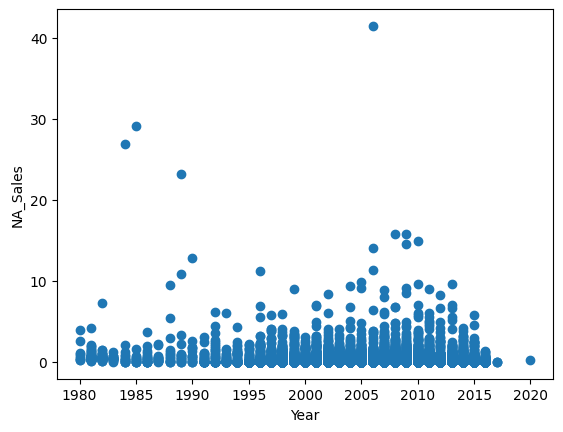

In [96]:
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('NA_Sales')

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=23)

In [98]:
x_train

705      2012.0
11513    2005.0
8916     2001.0
7682     2014.0
8319     1998.0
          ...  
11391    2009.0
10370    2006.0
9424     2010.0
13265    2002.0
8949     2009.0
Name: Year, Length: 11403, dtype: float64

In [99]:
x_train = np.array(x_train).reshape(-1,1)
x_train

array([[2012.],
       [2005.],
       [2001.],
       ...,
       [2010.],
       [2002.],
       [2009.]])

In [100]:
x_test = np.array(x_test).reshape(-1,1)
x_test

array([[2005.],
       [2009.],
       [2005.],
       ...,
       [2007.],
       [2011.],
       [2008.]])

In [101]:
np.any(np.isnan(x_train))


False

In [102]:
model = LinearRegression()

In [103]:
model.fit(x_train, y_train)

LinearRegression()

In [104]:
pred = model.predict(x_test)
pred

array([0.27513333, 0.22799561, 0.27513333, ..., 0.25156447, 0.20442675,
       0.23978004])

Text(0, 0.5, 'NA_Sales')

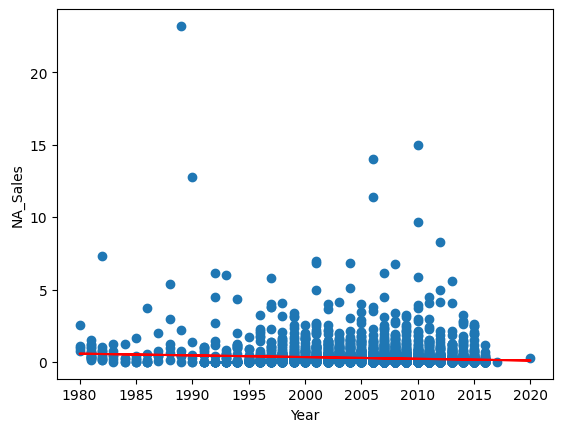

In [105]:
plt.scatter(x_test,y_test)
plt.plot(x_test, pred, color = 'red')

plt.xlabel('Year')
plt.ylabel('NA_Sales')

In [108]:
joblib.dump(model, 'LinearRegression.joblib')

['LinearRegression.joblib']

In [110]:
model=joblib.load('LinearRegression.joblib')